<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 3. Derivación numérica e interpolación



## Derivación

En esta sección se describe la derivación numérica, en otra lección posterior se verá como usar la derivación simbólica. 

La idea básica consiste en aproximar la operación de derivación por la diferencia en pequeños intervalos. Es decir partimos del límite:

$ f^{\prime }(x)=\lim _{h\to 0}{\frac {f(x+h)-f(x)}{h}}$

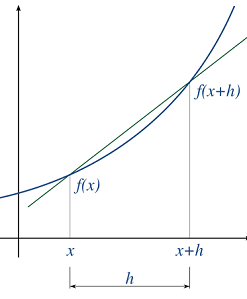

Y lo sustituimos por:
 
$ f^{\prime }(x_{0})\approx {\frac {f(x_{0}+h)-f(x_{0})}{h}}$, haciendo que $h$ sea un número pequeño

Esta es la forma más simple, llamada diferencias hacia adelante. También podríamos tomar la diferencia hacia atrás:

$ f^{\prime }(x_{0})\approx {\frac {f(x_{0})-f(x_{0}-h)}{h}}$

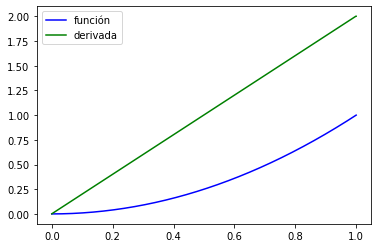

In [1]:
# Cálculo de la derivada mediante diferencias hacia adelante

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def deriv_difdelante(y, h):
    N = len(y)                        # Vector con N valores de la función
    deriv = np.zeros(N-1)             # Vector de N-1 puntos para almacenar la derivada
    for k in range(N-1):
        deriv[k] = (y[k+1] - y[k])/h    # Diferencia hacia adelante
    return deriv

npunt = 1000
x = np.linspace(0,1,npunt)            # Valores de x
y = x**2                              # función f(x) = x^2
h=1/npunt                             # Intervalo, viene definido por el número de puntos de x
dy = deriv_difdelante(y,h)            # Estimación numérica de la derivada
plt.plot(x,y,color="blue",label="función")
# Para poder imprimir las dos gráficas, el número de puntos debe ser igual, pero no tenemos la
# derivada en el último punto. Para solucionarlo repetimos el último valos de dy
dy = np.append(dy,dy[-1])
plt.plot(x,dy,color="green",label="derivada")
plt.legend()                          # Muestra la leyenda

Un ejemplo algo más complejo $y = sin^3(x)$

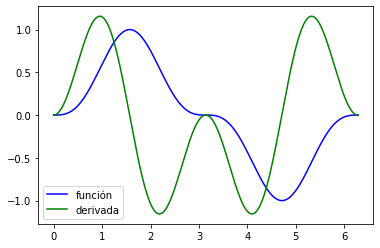

In [3]:
# Veamos otro ejemplo

npunt = 1000
x = np.linspace(0,2*np.pi,npunt)
y = np.sin(x)**3
h = 2*np.pi/npunt
dy = deriv_difdelante(y,h)
plt.plot(x,y,color="blue",label="función")
dy= np.append(dy,dy[-1])
plt.plot(x,dy,color="green",label="derivada")
plt.legend()

Para este ejemplo podemos calcular el error porque conocemos la expresión de la derivada $f'(x) = 3sin^2(x)cos(x)$

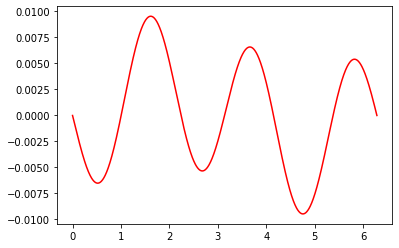

In [4]:
errordifs = 3*np.sin(x)**2*np.cos(x)-dy 
plt.plot(x,errordifs,color="red")

Normalmente se trabaja con las diferencias centrales, el valor medio de las diferencias hacia adelante y hacia atrás:
    

$ f^{\prime }(x_{0})\approx {\frac {f(x_{0}+h)-f(x_{0}-h)}{2h}}$

O con la extrapolación de Richardson que genera errores más pequeños y cuyo desarrollo no se hará en este curso introductorio.

## Numpy gradient

Numpy ofrece la función `gradient` que utiliza diferencias centrales. Esta función devuelve el valor normalizado, si queremos la derivada hay que multiplicar por $1/h$.

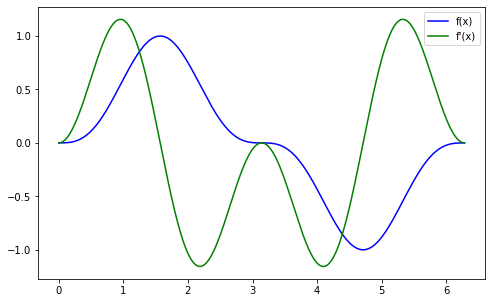

In [5]:
# Para el mismo ejemplo anterior y = sin^3(x)

dygrad = (1/h)*np.gradient(y)

plt.figure(figsize=(8,5))
plt.plot(x,y,color="blue",label="f(x)")
plt.plot(x,dygrad,color="green",label="f'(x)")
plt.legend()

Aparentemente se obtiene el mismo resultado, pero la gráfica puede resultar engañosa, hay que comparar los errores.

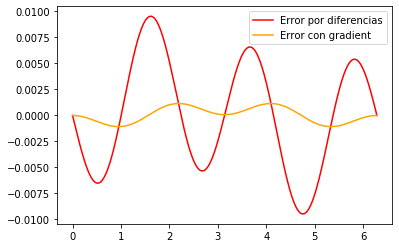

In [6]:
errorgradient = 3*np.sin(x)**2*np.cos(x)-dygrad
plt.plot(x,errordifs,color="red",label="Error por diferencias")
plt.plot(x,errorgradient,color="orange",label="Error con gradient")
plt.legend()

Aplicando reiteradamente la función `gradient` se pueden calcular las derivadas de orden superior, teniendo siempre la precaución de comprobar que la función es derivable.

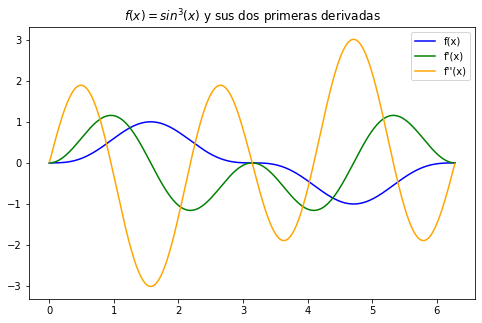

In [7]:
dy2grad = (1/h)*np.gradient(dygrad)          # Derivada segunda
plt.figure(figsize=(8,5))
plt.plot(x,y,color="blue",label="f(x)")
plt.plot(x,dygrad,color="green",label="f'(x)")
plt.title('$f(x) = sin^3(x)$ y sus dos primeras derivadas')
plt.plot(x,dy2grad,color="orange",label="f''(x)")
plt.legend()

## Interpolación

La interpolación resulta útil por sí misma y porque es un paso intermedio para resolver otros problemas. Como se explicará en la siguiente lección, la integración por el método de Simpson se basa en aproximar la función en intervalos muy pequeños por polinomios de segundo grado.

En este apartado no vamos a desarrollar funciones sino que usaremos `interpolate` del paquete SciPy.

Usaremos la función $y=sin(x)+1/3 cos(2x)$.

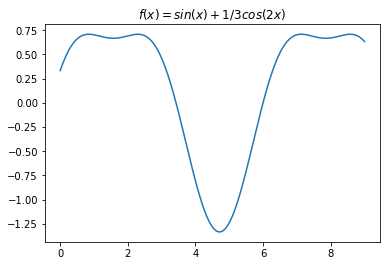

In [10]:
from scipy import interpolate

x = np.linspace(0,9,1000)
y = np.sin(x)+(1/3)*np.cos(2*x)
plt.title("$f(x)=sin(x)+1/3 cos(2x)$")
plt.plot(x,y)

Tomamos 10 puntos equiespaciados y representamos su diagrama de dispersión. Nos servirán para interpolar.

[ 0.33333333  0.70275537  0.69141622  0.46117677 -0.80530251 -1.23861478
  0.00186915  0.70256567  0.67013842  0.63222405]


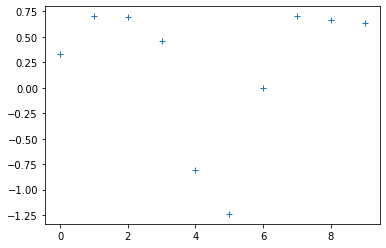

In [11]:
x = np.linspace(0,9,10)          # Diez puntos equiespaciados
y = np.sin(x)+(1/3)*np.cos(2*x)

print(y)

plt.plot(x,y,'+')

Queremos interpolar la función en 50 puntos y para ello invocamos `interp`

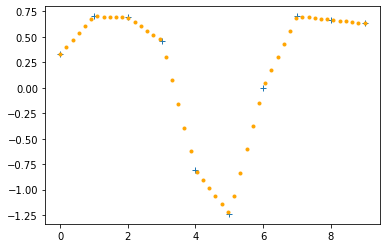

In [12]:
xinterpolacion= np.linspace(0,9,50)             
yinterpoladas = np.interp(xinterpolacion, x, y)
plt.plot(x,y,'+')
plt.plot(xinterpolacion,yinterpoladas,'.',color='orange')

La solución no parece muy satisfactoria porque `interp` lleva a cabo una interpolación lineal. Vamos a probar con otras funciones más potentes del módulo `scipy.interpolate`. Con `interp1d` se pueden usar polinomios.

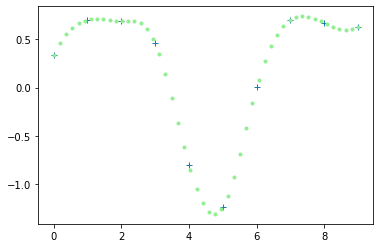

In [13]:
from scipy.interpolate import interp1d
fcubica = interp1d(x, y, kind='cubic')   # Devuelve la función de interpolación, no los valores
y3interpoladas = fcubica(xinterpolacion) # Aquí aplicamos la función a los puntos de interpolación
plt.plot(x,y,'+')
plt.plot(xinterpolacion,y3interpoladas,'.',color='lightgreen')

A simple vista, se parece bastante más a la función original. La interpolación con splines genera polinomios más suavizados.

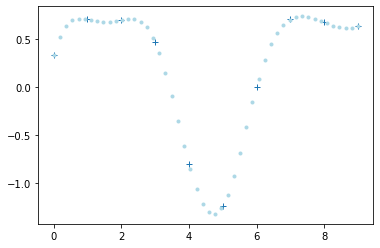

In [14]:
s = interpolate.InterpolatedUnivariateSpline(x, y, k=4)
yspline = s(xinterpolacion)
plt.plot(x,y,'+')
plt.plot(xinterpolacion,yspline,'.',color='lightblue')

Finalmente representamos la función y las interpolaciones en la misma gráfica

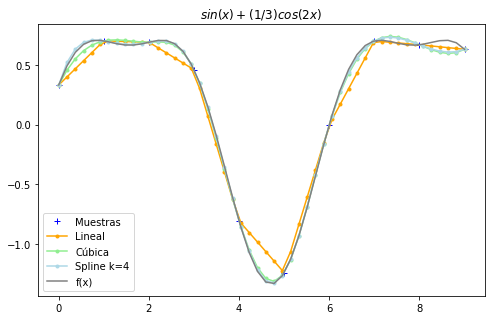

In [15]:
plt.figure(figsize=(8,5))

yfuncion = np.sin(xinterpolacion)+(1/3)*np.cos(2*xinterpolacion)
plt.plot(x,y,'+',color="blue",label="Muestras")
plt.plot(xinterpolacion,yinterpoladas,'.-',color='orange',label="Lineal")
plt.plot(xinterpolacion,y3interpoladas,'.-',color='lightgreen',label="Cúbica")
plt.plot(xinterpolacion,yspline,'.-',color='lightblue',label="Spline k=4")
plt.plot(xinterpolacion,yfuncion,'-',color='grey',label="f(x)")
plt.title('$sin(x)+(1/3)cos(2x)$')
plt.legend()

Por último, calculamos el error cuadrático medio con cada uno de los tres métodos de interpolación.

In [17]:
def calcRMSE(y,yaprox):
    return(1/len(y))*np.sqrt(np.sum(np.abs(y-yaprox)**2))

print("Error cuadrático medio lineal {:.8}".format(calcRMSE(yfuncion,yinterpoladas)))
print("Error cuadrático medio cúbica {:.8}".format(calcRMSE(yfuncion,y3interpoladas)))
print("Error cuadrático medio spline k4 {:.8}".format(calcRMSE(yfuncion,yspline)))

Error cuadrático medio lineal 0.012913204
Error cuadrático medio cúbica 0.0049311399
Error cuadrático medio spline k4 0.0037978


### Aproximación local

La función `interpolate` ofrece más opciones interesantes, como polinomios de Lagrange o la aproximación por serie de Taylor. Recordemos esta útlima. Sea $f(x)$ una función infinitamente diferenciable en el entorno de $a, a \in \mathbb{R}$. La aproximación polinómica de Taylor es:

$f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots$ que se puede escribir de forma compacta como  $f(x) = \sum_{n=0} ^ {\infty} \frac {f^{(n)}(a)}{n!} (x-a)^{n}$

Si nos quedamos solo con el primer término en $x$, es una aproximación lineal.

Veamos como se aproxima la función $sen(x)$ en torno al punto $pi/2$

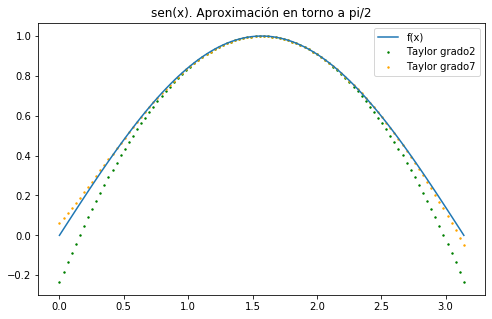

In [18]:
from scipy.interpolate import approximate_taylor_polynomial
npuntos = 100
x = np.linspace(0,np.pi,npuntos)
y = np.sin(x)
a = np.pi/2
grado = 2                              # Aproximación cuadrática
xaprox = np.linspace(-a,a,npuntos)
ptaylor2 = approximate_taylor_polynomial(np.sin, a, grado, 0.01)
plt.figure(figsize=(8,5))
plt.scatter(xaprox+a,ptaylor2(xaprox),s=2,label="Taylor grado"+str(grado),color="green")
grado = 7                              # Aproximación de grado 7
ptaylor7 = approximate_taylor_polynomial(np.sin, a, grado, 0.01)
plt.scatter(xaprox+a,ptaylor7(xaprox),s=2,label="Taylor grado"+str(grado),color="orange")
plt.plot(x,y,label="f(x)")
plt.title("sen(x). Aproximación en torno a pi/2")
plt.legend()

Por último, representamos los errores de aproximación que aumentan a medida que nos alejamos del punto de aproximación local.

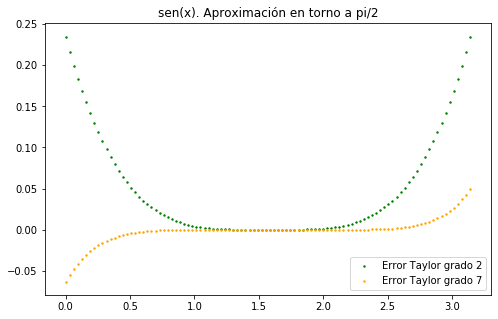

In [78]:
error2 = y - ptaylor2(xaprox)
error7 = y - ptaylor7(xaprox)
plt.figure(figsize=(8,5))
plt.scatter(xaprox+a,error2,s=2,label="Error Taylor grado 2",color="green")
plt.scatter(xaprox+a,error7,s=2,label="Error Taylor grado 7",color="orange")
plt.title("sen(x). Aproximación en torno a pi/2")
plt.legend()

---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 